In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('DanCu.csv')
df

,Địa phương,Năm,Diện tích(km2),Tổng_số_cặp_kết_hôn,Kết hôn lần đầu,Lần thứ 2 trở lên,Tỷ_lệ_tăng_dân_số,Tuổi_kết_hôn_TB,Mật độ dân số (Người/km2),Tỷ_lệ_sinh
0,Hà Nội,2005,3338.42,32732,31027,1705,2.02,23.75,2043.76,1.83
1,Hà Nội,2006,3350.06,40799,36241,4558,1.78,24.90,2089.18,1.88
2,Hà Nội,2007,3342.19,39845,36246,3599,1.37,24.46,2096.37,1.91
3,Hà Nội,2008,3338.14,49648,46513,3135,1.56,24.20,2038.34,2.06
4,Hà Nội,2009,3329.66,43123,39901,3222,1.41,23.31,2079.17,2.08
5,Hà Nội,2010,3345.21,39225,34553,4672,2.50,24.90,2052.89,2.00
6,Hà Nội,2011,3328.90,44116,40219,3897,1.93,25.20,2050.47,2.02
7,Hà Nội,2012,3323.60,44935,42234,2701,1.54,25.30,2103.57,2.06
8,Hà Nội,2013,3324.30,45430,43893,1537,1.63,24.90,2144.33,2.03
9,Hà Nội,2014,3324.50,45832,41939,3893,1.70,25.10,2191.47,2.18


In [4]:
df.shape

(18, 10)

In [29]:
df

,Địa phương,Năm,Diện tích(km2),Tổng_số_cặp_kết_hôn,Kết hôn lần đầu,Lần thứ 2 trở lên,Tỷ_lệ_tăng_dân_số,Tuổi_kết_hôn_TB,Mật độ dân số (Người/km2),Tỷ_lệ_sinh
0,Hà Nội,2005,3338.42,32732,31027,1705,2.02,23.75,2043.76,1.83
1,Hà Nội,2006,3350.06,40799,36241,4558,1.78,24.90,2089.18,1.88
2,Hà Nội,2007,3342.19,39845,36246,3599,1.37,24.46,2096.37,1.91
3,Hà Nội,2008,3338.14,49648,46513,3135,1.56,24.20,2038.34,2.06
4,Hà Nội,2009,3329.66,43123,39901,3222,1.41,23.31,2079.17,2.08
5,Hà Nội,2010,3345.21,39225,34553,4672,2.50,24.90,2052.89,2.00
6,Hà Nội,2011,3328.90,44116,40219,3897,1.93,25.20,2050.47,2.02
7,Hà Nội,2012,3323.60,44935,42234,2701,1.54,25.30,2103.57,2.06
8,Hà Nội,2013,3324.30,45430,43893,1537,1.63,24.90,2144.33,2.03
9,Hà Nội,2014,3324.50,45832,41939,3893,1.70,25.10,2191.47,2.18


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Địa phương                 18 non-null     object 
 1   Năm                        18 non-null     int64  
 2   Diện tích(km2)             18 non-null     float64
 3   Tổng_số_cặp_kết_hôn        18 non-null     int64  
 4   Kết hôn lần đầu            18 non-null     int64  
 5   Lần thứ 2 trở lên          18 non-null     int64  
 6   Tỷ_lệ_tăng_dân_số          18 non-null     float64
 7   Tuổi_kết_hôn_TB            18 non-null     float64
 8   Mật độ dân số (Người/km2)  18 non-null     float64
 9   Tỷ_lệ_sinh                 18 non-null     float64
dtypes: float64(5), int64(4), object(1)
memory usage: 1.5+ KB


In [17]:
df.describe()

,Năm,Diện tích(km2),Tổng_số_cặp_kết_hôn,Kết hôn lần đầu,Lần thứ 2 trở lên,Tỷ_lệ_tăng_dân_số,Tuổi_kết_hôn_TB,Mật độ dân số (Người/km2),Tỷ_lệ_sinh
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2013.500000,3343.537778,43022.500000,38730.166667,4292.333333,1.791111,25.191667,2216.786111,2.056667
std,5.338539,14.782866,4597.423604,4723.733970,1862.224445,0.387631,0.907156,165.163256,0.113863
min,2005.000000,3323.600000,32732.000000,31027.000000,1537.000000,1.020000,23.310000,2038.340000,1.830000
25%,2009.250000,3329.090000,40083.500000,34748.500000,3123.750000,1.545000,24.900000,2081.672500,2.005000
50%,2013.500000,3343.700000,43624.500000,40060.000000,3859.000000,1.835000,25.200000,2167.900000,2.060000
75%,2017.750000,3358.600000,45731.500000,41881.750000,5914.750000,2.027500,25.790000,2343.665000,2.117500
max,2022.000000,3359.840000,49852.000000,46513.000000,7849.000000,2.500000,26.890000,2511.000000,2.250000


# Trục quan hóa

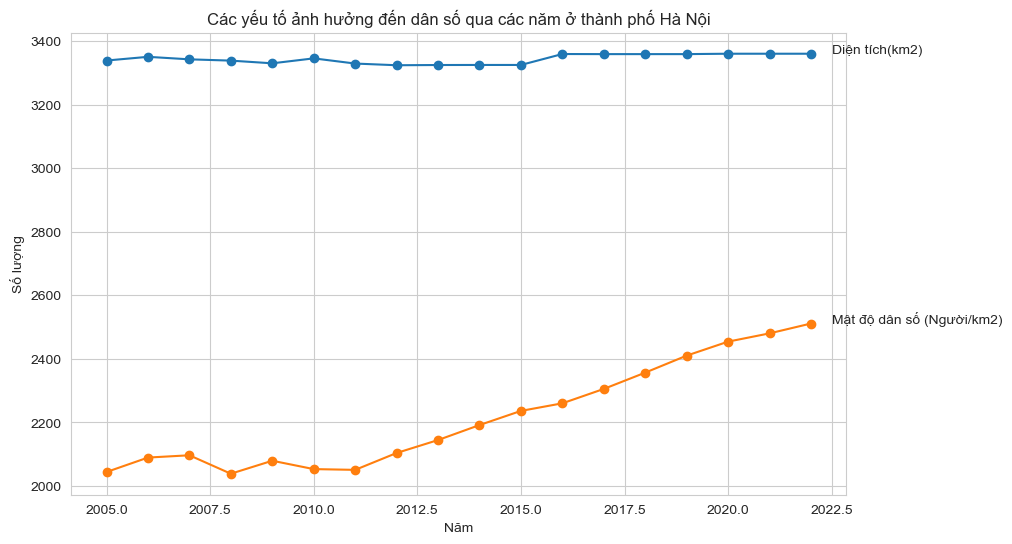

In [25]:
years = df['Năm']
columns = ['Diện tích(km2)', 'Mật độ dân số (Người/km2)']

# Tạo biểu đồ
plt.figure(figsize=(10, 6))

for column in columns:
    plt.plot(years, df[column], marker='o', label=column)
plt.title('Các yếu tố ảnh hưởng đến dân số qua các năm ở thành phố Hà Nội')
plt.xlabel('Năm')
plt.ylabel('Số lượng')
plt.grid(True)
for i, column in enumerate(columns):
    plt.text(years.iloc[-1] + 0.5, df[column].iloc[-1], column)
plt.show()

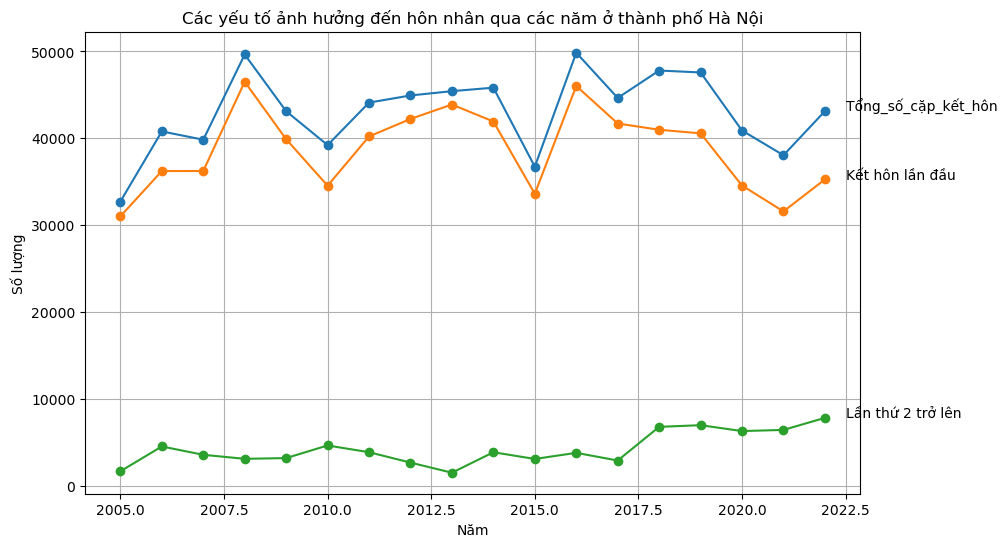

In [9]:
years = df['Năm']
columns = ['Tổng_số_cặp_kết_hôn', 'Kết hôn lần đầu', 'Lần thứ 2 trở lên']

# Tạo biểu đồ
plt.figure(figsize=(10, 6))

for column in columns:
    plt.plot(years, df[column], marker='o', label=column)
plt.title('Các yếu tố ảnh hưởng đến hôn nhân qua các năm ở thành phố Hà Nội')
plt.xlabel('Năm')
plt.ylabel('Số lượng')
plt.grid(True)
for i, column in enumerate(columns):
    plt.text(years.iloc[-1] + 0.5, df[column].iloc[-1], column)
plt.show()

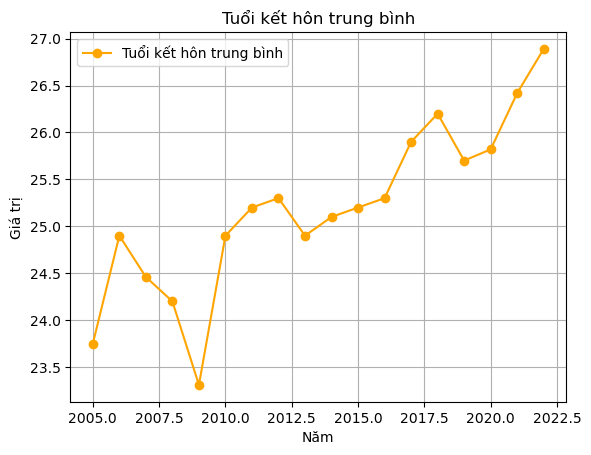

In [13]:
plt.plot(df['Năm'], df['Tuổi_kết_hôn_TB'], marker='o', label='Tuổi kết hôn trung bình', color='orange')

plt.title('Tuổi kết hôn trung bình')
plt.xlabel('Năm')
plt.ylabel('Giá trị')
plt.legend()
plt.grid(True)
plt.show()

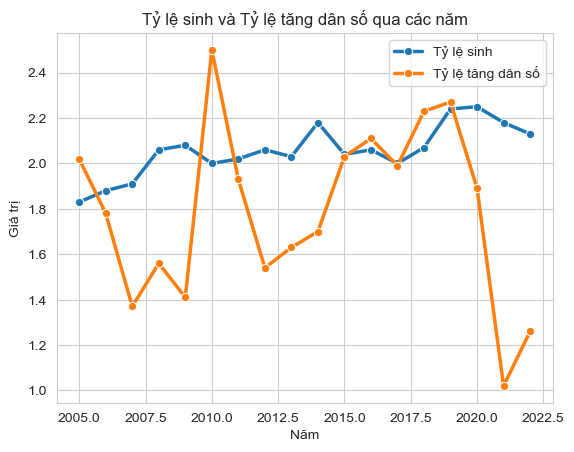

In [27]:
sns.lineplot(data=df, x='Năm', y='Tỷ_lệ_sinh', label='Tỷ lệ sinh', linewidth=2.5,marker='o')
sns.lineplot(data=df, x='Năm', y='Tỷ_lệ_tăng_dân_số', label='Tỷ lệ tăng dân số', linewidth=2.5,marker='o')

# Add title and labels
plt.title('Tỷ lệ sinh và Tỷ lệ tăng dân số qua các năm')
plt.xlabel('Năm')
plt.ylabel('Giá trị')

# Add legend
plt.legend()

plt.show()


# Chạy mô hình dự đoán dân số trong 10 năm tiếp theo


In [4]:
df = df.drop('Địa phương',axis=1)

## Chạy mô hình dự đoán tỷ lệ sinh

In [5]:
X = df.drop(columns=['Tỷ_lệ_sinh'])  # Đặt các biến độc lập vào X
y_birth_rate = df['Tỷ_lệ_sinh']  # Biến mục tiêu: Tỷ lệ sinh

X_train, X_test, y_train, y_test = train_test_split(X, y_birth_rate, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu cho các mô hình hồi quy tuyến tính và Random Forest
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression MSE:", lr_mse)
print("Linear Regression R-squared:", lr_r2)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest Regression MSE:", rf_mse)
print("Random Forest Regression R-squared:", rf_r2)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print("Gradient Boosting Regression MSE:", gb_mse)
print("Gradient Boosting Regression R-squared:", gb_r2)

Linear Regression MSE: 0.003191861624180817
Linear Regression R-squared: 0.5323279671529931
Random Forest Regression MSE: 0.018165442500000246
Random Forest Regression R-squared: -1.661603296703337
Gradient Boosting Regression MSE: 0.010261923345925036
Gradient Boosting Regression R-squared: -0.5035785122234506


In [6]:
years_future = np.arange(2023, 2033)
predictions = lr_model.predict(scaler.transform(pd.DataFrame({
    'Năm': years_future,
    'Diện tích(km2)': df['Diện tích(km2)'].mean(),  
    'Tổng_số_cặp_kết_hôn': df['Tổng_số_cặp_kết_hôn'].mean(), 
    'Kết hôn lần đầu': df['Kết hôn lần đầu'].mean(),  
    'Lần thứ 2 trở lên': df['Lần thứ 2 trở lên'].mean(),  
    'Tỷ_lệ_tăng_dân_số': df['Tỷ_lệ_tăng_dân_số'].mean(), 
    'Tuổi_kết_hôn_TB': df['Tuổi_kết_hôn_TB'].mean(),  
    'Mật độ dân số (Người/km2)': df['Mật độ dân số (Người/km2)'].mean(), 
})))

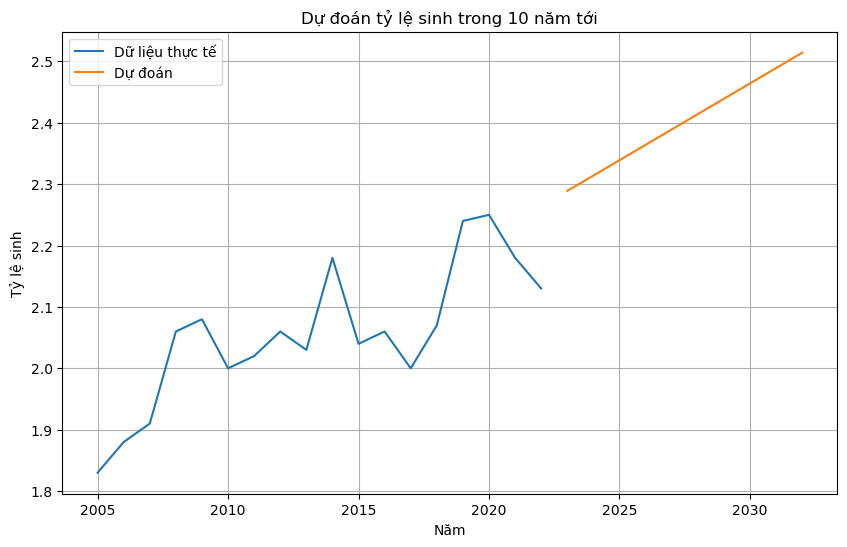

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['Năm'], df['Tỷ_lệ_sinh'], label='Dữ liệu thực tế')
plt.plot(years_future, predictions, label='Dự đoán')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ sinh')
plt.title('Dự đoán tỷ lệ sinh trong 10 năm tới')
plt.legend()
plt.grid(True)
plt.show()

## Chạy mô hình dự đoán tuổi kết hôn trung bình

In [12]:
X = df.drop(columns=['Tuổi_kết_hôn_TB'])  # Đặt các biến độc lập vào X
y_total_couples = df['Tuổi_kết_hôn_TB']  # Biến mục tiêu: Tổng số cặp kết hôn

X_train, X_test, y_train, y_test = train_test_split(X, y_total_couples, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu cho các mô hình hồi quy tuyến tính và Random Forest
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression MSE:", lr_mse)
print("Linear Regression R-squared:", lr_r2)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest Regression MSE:", rf_mse)
print("Random Forest Regression R-squared:", rf_r2)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print("Gradient Boosting Regression MSE:", gb_mse)
print("Gradient Boosting Regression R-squared:", gb_r2)

Linear Regression MSE: 0.14086876523977673
Linear Regression R-squared: 0.7551586940913958
Random Forest Regression MSE: 0.19168910166666261
Random Forest Regression R-squared: 0.6668288395896267
Gradient Boosting Regression MSE: 0.24392949117289928
Gradient Boosting Regression R-squared: 0.576030817997616


In [13]:
years_future = np.arange(2023, 2033)
predictions = lr_model.predict(scaler.transform(pd.DataFrame({
    'Năm': years_future,
    'Diện tích(km2)': df['Diện tích(km2)'].mean(),  
    'Tổng_số_cặp_kết_hôn': df['Tổng_số_cặp_kết_hôn'].mean(),
    'Kết hôn lần đầu': df['Kết hôn lần đầu'].mean(),  
    'Lần thứ 2 trở lên': df['Lần thứ 2 trở lên'].mean(),  
    'Tỷ_lệ_tăng_dân_số': df['Tỷ_lệ_tăng_dân_số'].mean(),  
    'Mật độ dân số (Người/km2)': df['Mật độ dân số (Người/km2)'].mean(), 
    'Tỷ_lệ_sinh': df['Tỷ_lệ_sinh'].mean(), 
})))

In [14]:
predictions

array([28.17624074, 28.4969874 , 28.81773405, 29.1384807 , 29.45922736,
       29.77997401, 30.10072066, 30.42146732, 30.74221397, 31.06296062])

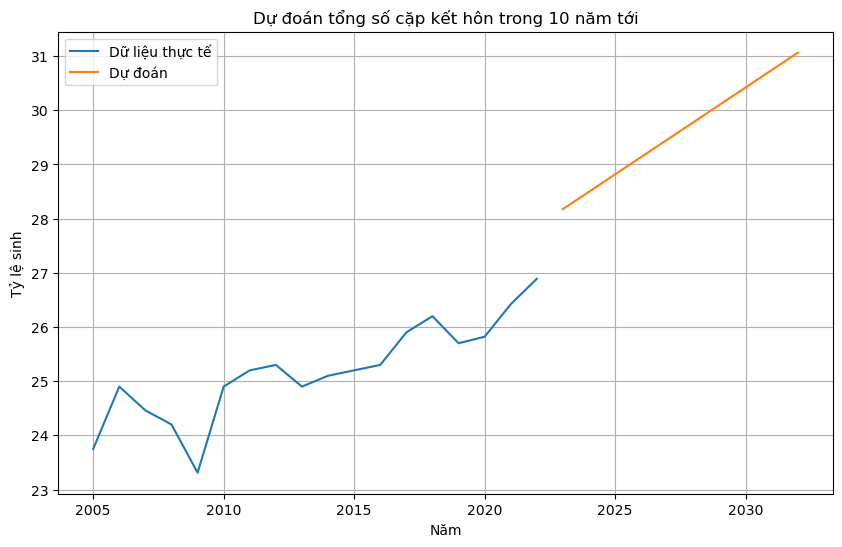

In [16]:
# Vẽ biểu đồ dự đoán
plt.figure(figsize=(10, 6))
plt.plot(df['Năm'], df['Tuổi_kết_hôn_TB'], label='Dữ liệu thực tế')
plt.plot(years_future, predictions, label='Dự đoán')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ sinh')
plt.title('Dự đoán tổng số cặp kết hôn trong 10 năm tới')
plt.legend()
plt.grid(True)
plt.show()